In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colormaps
from math import isnan

# DATA_FILE = "../testbench_results/30_06_2025_14:18:11_3.csv"
# DATA_FILE = "../testbench_results/30_06_2025_15:38:35_3.csv"
DATA_FILE = "../testbench_results/07_07_2025_12:52:55_1.csv"
df = pd.read_csv(DATA_FILE)
index_divisor = 100
df[f"[index / {index_divisor}]"] = df.index / index_divisor
df[f"[index / {index_divisor}]"] = df[f"[index / {index_divisor}]"].astype(int)

# check accuracy
print(f"Total accuracy is {100.0* df['Accuracy'].mean()}%")

Total accuracy is 100.0%


In [22]:
def plot_means_std_by_column(x_column, y_column):
    plt.figure()
    grouped_df = df.groupby(['R/W', x_column]).agg(['mean', 'std'])
    grouped_df.columns = ['_'.join(col).strip() for col in grouped_df.columns.values]
    grouped_df = grouped_df.reset_index()

    operations = ['Read', 'Write']
    colors = ['tab:blue', 'tab:orange']
    for op, color in zip(operations, colors):
        subset = grouped_df[grouped_df['R/W'] == op]
        sizes = subset[x_column]
        means = subset[f"{y_column}_mean"]
        stds = subset[f"{y_column}_std"]
        
        # Plot with error bars
        plt.plot(sizes, means, color='black')
        plt.fill_between(sizes, means-stds, means+stds, color=color, label=op, alpha=0.6)

    plt.title(f"Effect of {x_column} on {y_column}")
    plt.xlim(0)
    plt.ylim(0)
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.legend()

In [23]:
def plot_hist_from_size_address(column):
    # generate 2d arra
    arr = np.full((256, 256), -1)
    for address in range(256):
        for size in range(1, 256-address + 1):
            val = df[(df['Size'] == size) & (df['Address'] == address)][column].mean()
            if not isnan(val):
                arr[address][size-1] = val

    # create custom color map
    # values we dont have data for are shown in white
    base_cmap = colormaps['viridis']
    colors = [(0.0, 'white'),  # Values below vmin will be white
            (0.0, base_cmap(0.0)), # Start of base_cmap
            (1.0, base_cmap(1.0)), # End of base_cmap
            (1.0, 'white')] # Values above vmax will be white
    custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

    #plot
    plt.figure()
    im = plt.imshow(arr, cmap=custom_cmap)
    plt.colorbar(im)
    plt.title(column)
    plt.xlabel("Size - 1")
    plt.ylabel("Address")
        

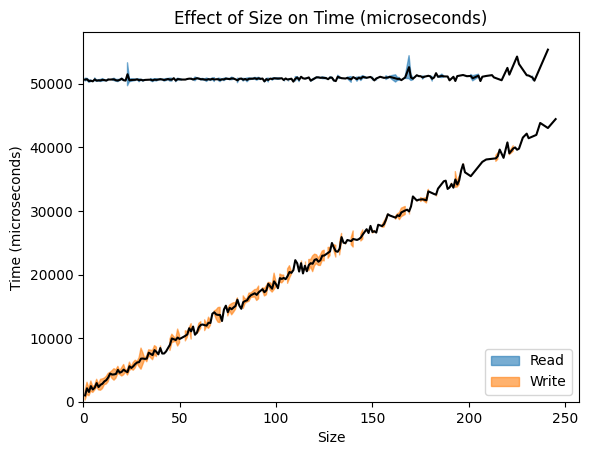

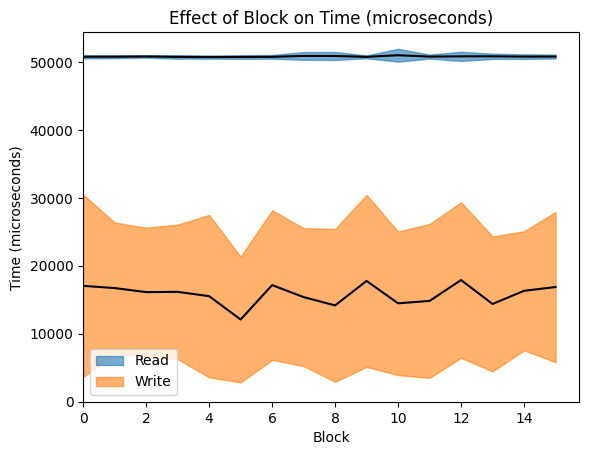

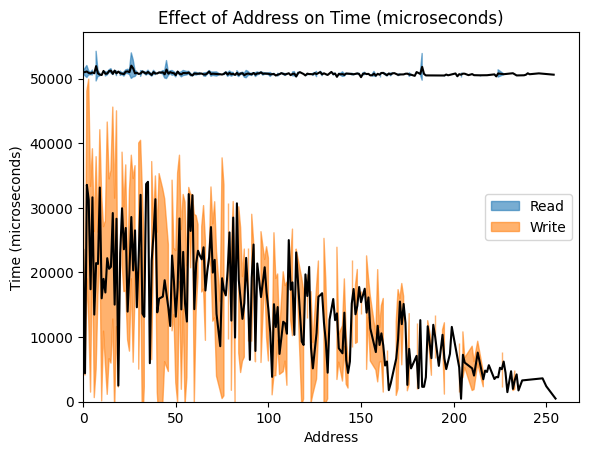

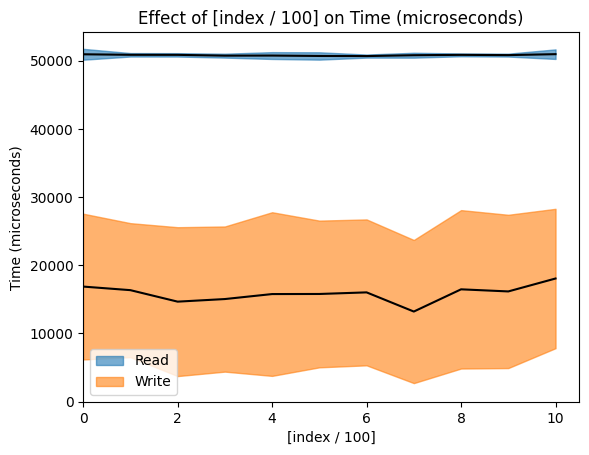

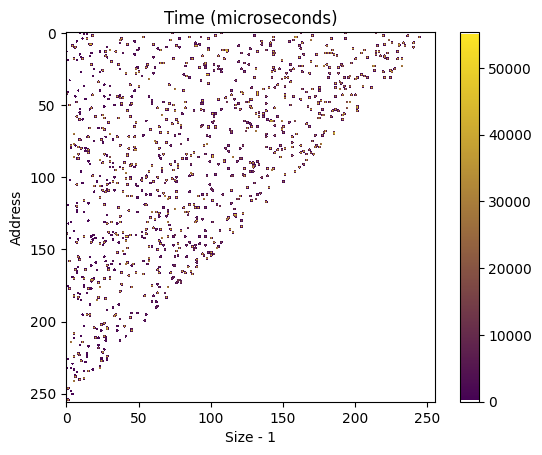

In [24]:
# Time
plot_means_std_by_column('Size', 'Time (microseconds)')
plot_means_std_by_column('Block', 'Time (microseconds)')
plot_means_std_by_column('Address', 'Time (microseconds)')
plot_means_std_by_column(f"[index / {index_divisor}]", 'Time (microseconds)')
plot_hist_from_size_address('Time (microseconds)')

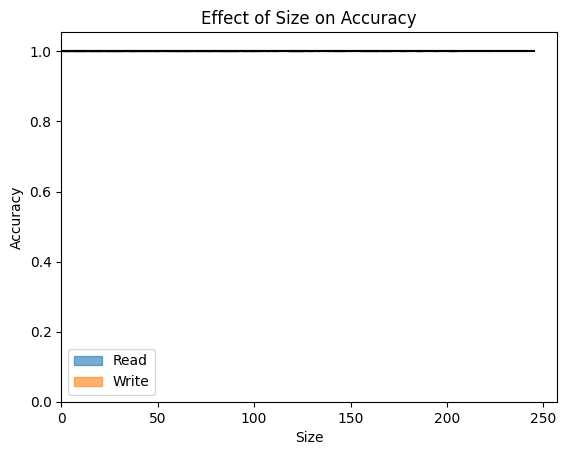

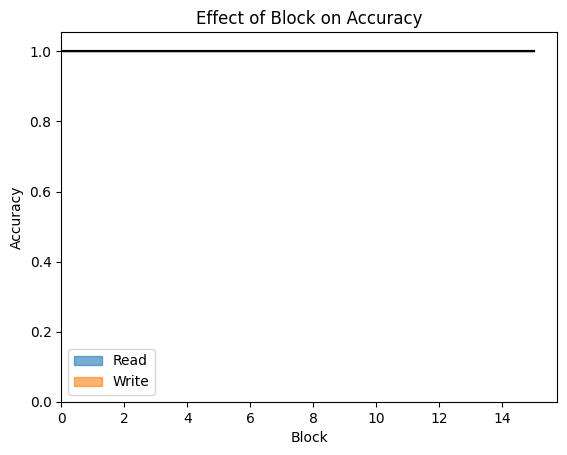

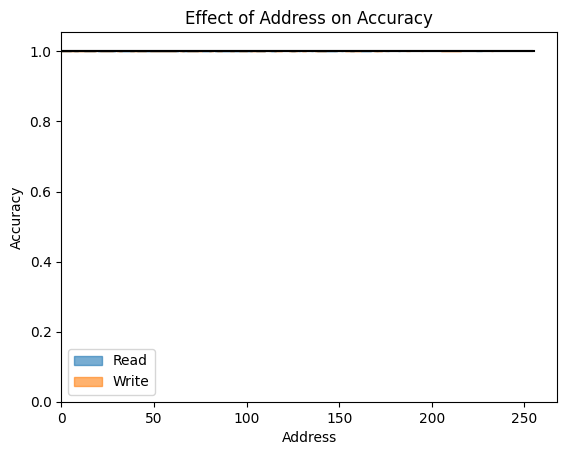

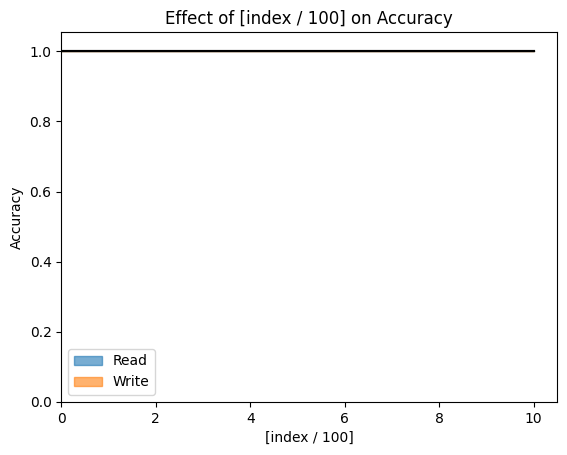

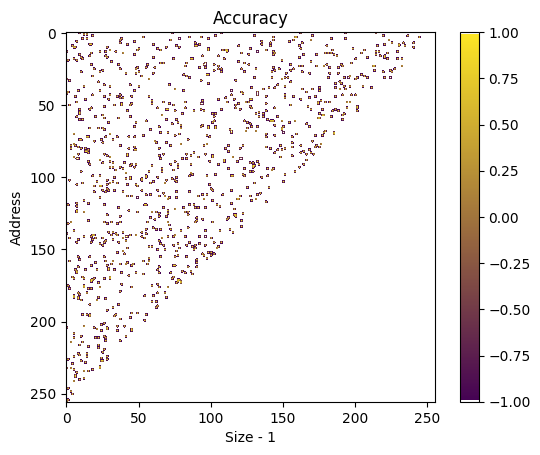

In [25]:
# Accuracy
plot_means_std_by_column('Size', 'Accuracy')
plot_means_std_by_column('Block', 'Accuracy')
plot_means_std_by_column('Address', 'Accuracy')
plot_means_std_by_column(f"[index / {index_divisor}]", 'Accuracy')
plot_hist_from_size_address('Accuracy')